<a href="https://colab.research.google.com/github/gadilshina-ve/PDA_SOL/blob/main/%D0%A1%D0%B0%D0%BC%D0%BE%D1%81%D1%82%D0%BE%D1%8F%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_4_visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашная работа 3. Визуальный анализ.

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

#### Полезная литература

- [Галерея графиков Matplotlib](https://matplotlib.org/gallery/index.html)
- [Галерея графиков Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Открытый курс машинного обучения. Тема 2: Визуализация данных c Python](https://habr.com/company/ods/blog/323210/)

In [121]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

## Визуальный анализ данных

В этом задании вам предлагается провести визуальный анализ датасета о прокатах велосипедов https://www.kaggle.com/c/bike-sharing-demand/data. Оригинальная задача предполагает построение модели предсказания количества прокатов в городе в зависимости от погоды.

Для каждого дня проката известны следующие признаки (как они были указаны в источнике данных):
- season: 1 - весна, 2 - лето, 3 - осень, 4 - зима
- yr: 0 - 2011, 1 - 2012
- mnth: от 1 до 12
- holiday: 0 - нет праздника, 1 - есть праздник
- weekday: от 0 до 6
- workingday: 0 - нерабочий день, 1 - рабочий день
- weathersit: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман)
- temp: температура в Цельсиях
- atemp: температура по ощущениям в Цельсиях
- hum: влажность
- windspeed(mph): скорость ветра в милях в час
- windspeed(ms): скорость ветра в метрах в секунду
- cnt: количество арендованных велосипедов (это целевой признак, его мы будем предсказывать)

Загрузите с помощью pandas файл `bikes_rent.csv.gz` и выведите первые 5 строк. Ознакомьтесь с данными с помощью функций describe и info.

In [122]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks GadilshinaVE/Python/bikes_rent.csv')
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


In [123]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          731 non-null    int64  
 1   yr              731 non-null    int64  
 2   mnth            731 non-null    int64  
 3   holiday         731 non-null    int64  
 4   weekday         731 non-null    int64  
 5   workingday      731 non-null    int64  
 6   weathersit      731 non-null    int64  
 7   temp            731 non-null    float64
 8   atemp           731 non-null    float64
 9   hum             731 non-null    float64
 10  windspeed(mph)  731 non-null    float64
 11  windspeed(ms)   731 non-null    float64
 12  cnt             731 non-null    int64  
dtypes: float64(5), int64(8)
memory usage: 74.4 KB


In [125]:
df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,20.310776,23.717699,62.789406,12.762576,5.705220,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,7.505091,8.148059,14.242910,5.192357,2.321125,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,0.670650,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.820424,16.892125,52.000000,9.041650,4.041864,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,20.431653,24.336650,62.666700,12.125325,5.420351,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.872076,30.430100,73.020850,15.625371,6.984967,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,15.198937,8714.000000


Давайте посмотрим на графиках, как целевой признак зависит количество прокатов (cnt) зависит от остальных признаков `df.columns[:-1]`.

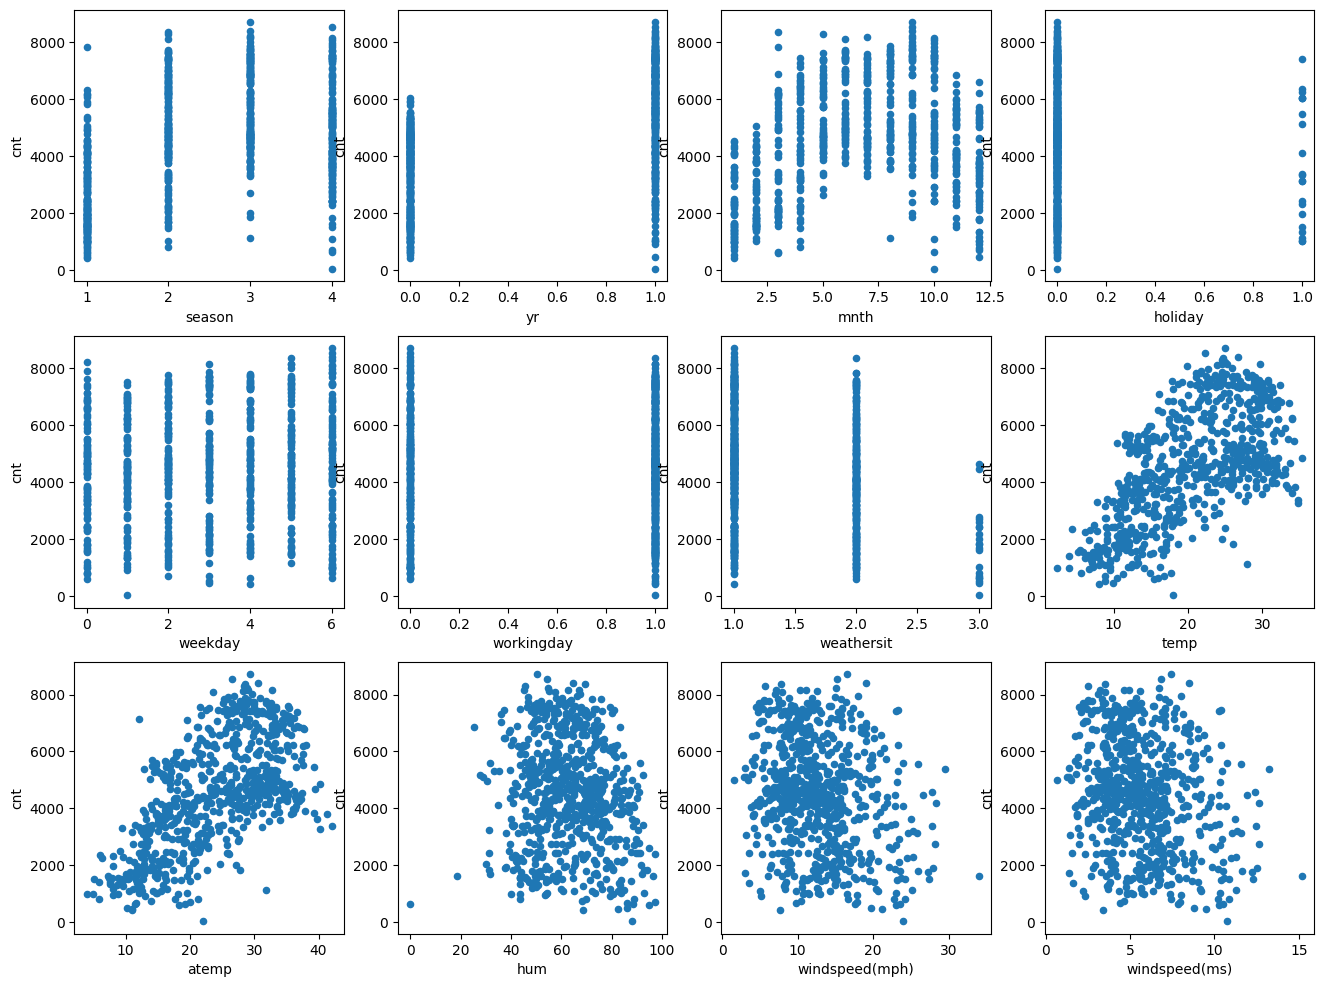

In [126]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 12))
for idx, feature in enumerate(df.columns[:-1]):
     df.plot(feature, "cnt", subplots=True, kind="scatter", ax=axes[idx // 4, idx % 4])

## 1. Ответьте на вопросы:

#### Каков характер зависимости числа прокатов от месяца?

**Ответ:** В теплые месяцы (с апреля по ноябрь) прокат выше среднего значения.

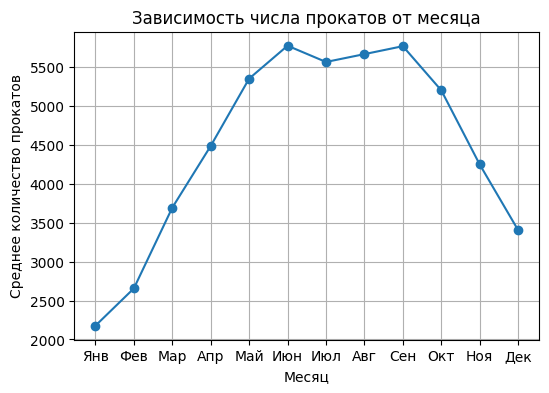

In [128]:
monthly_rentals = df.groupby('mnth')['cnt'].mean()

# Создание графика
plt.figure(figsize=(6, 4))
plt.plot(monthly_rentals.index, monthly_rentals, marker='o', linestyle='-')
plt.title('Зависимость числа прокатов от месяца')
plt.xlabel('Месяц')
plt.ylabel('Среднее количество прокатов')
plt.xticks(monthly_rentals.index, ['Янв', 'Фев', 'Мар', 'Апр', 'Май', 'Июн', 'Июл', 'Авг', 'Сен', 'Окт', 'Ноя', 'Дек'])
plt.grid(True)
plt.show()

#### Укажите один или два признака, от которых число прокатов скорее всего зависит линейно
_(чем больше значение, тем больше прокатов или наоборот, например)_

Можете проверить результат с помощью lnplot.

**Ответ:** temp (температура в Цельсиях) и atemp (температура по ощущениям в Цельсиях) - два признака, от которых число прокатов скорее всего зависит линейно

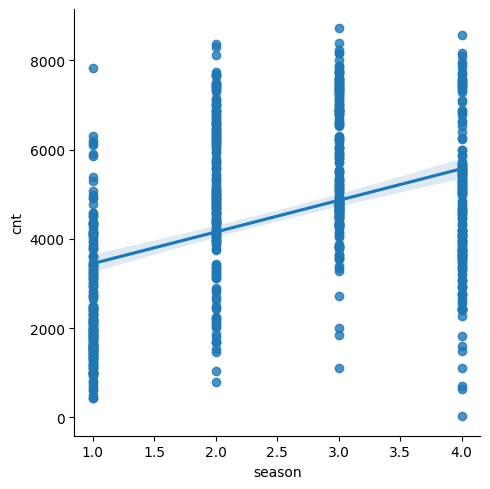

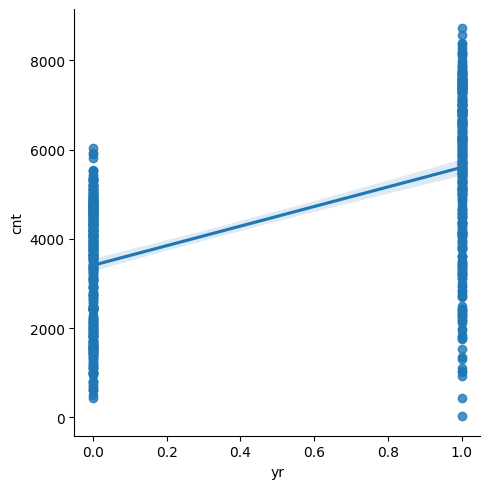

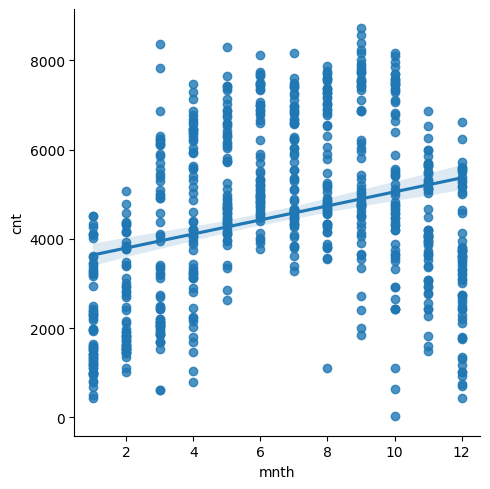

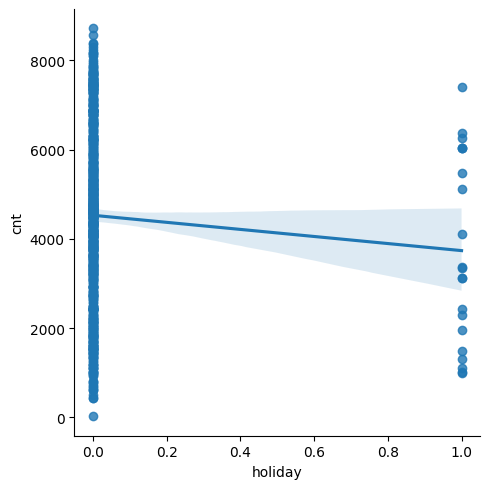

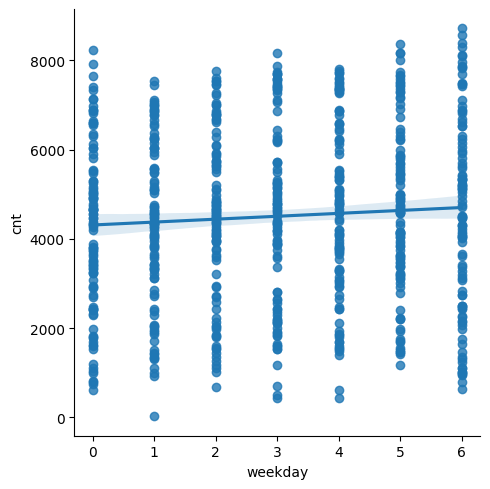

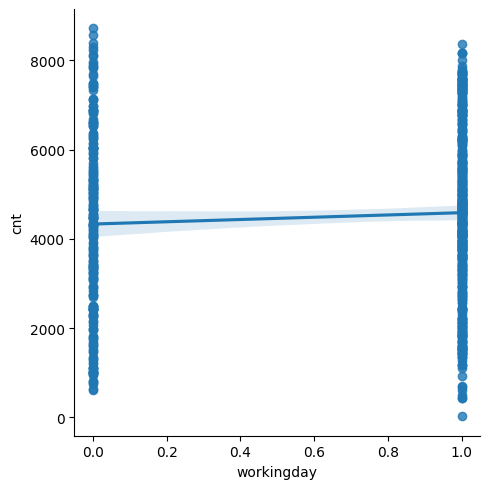

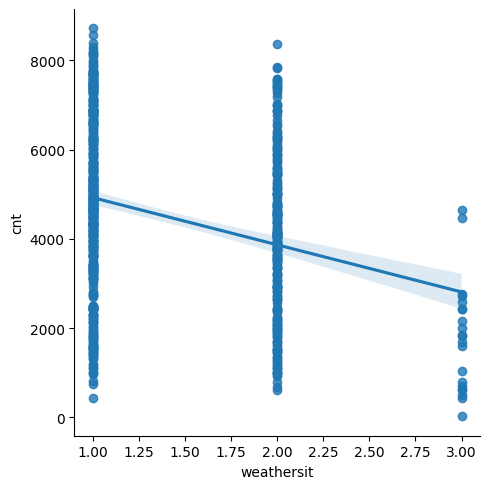

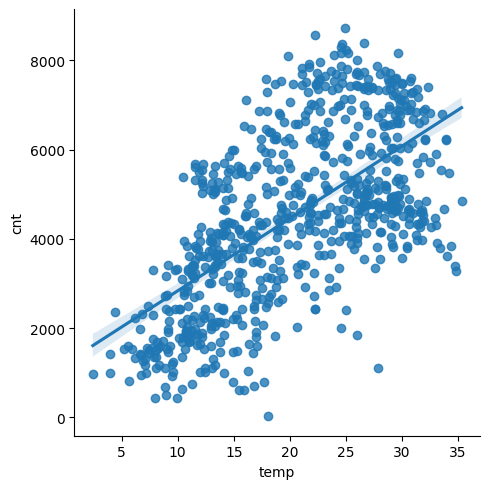

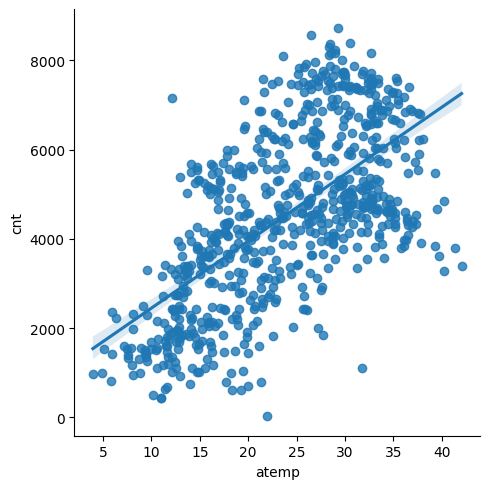

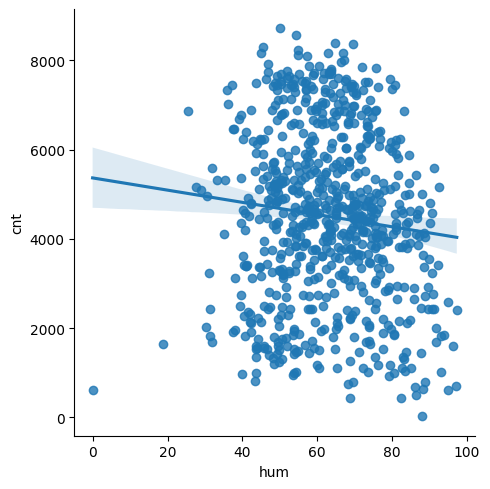

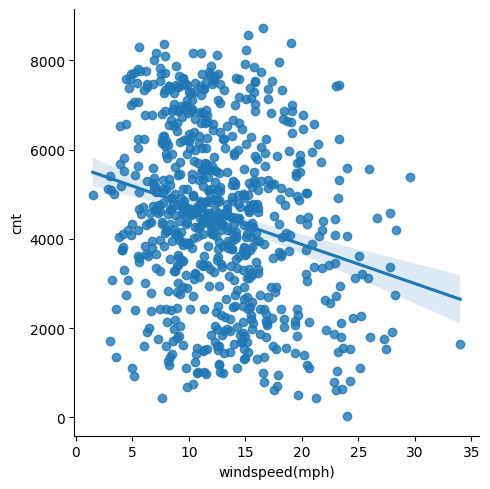

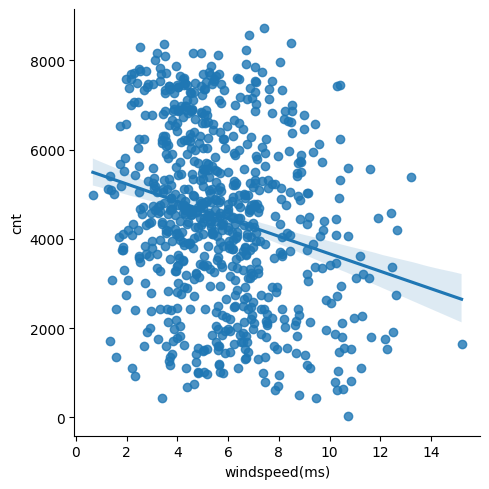

In [129]:
correlation = df.corrwith(df['cnt'])

correlation_df = pd.DataFrame({'Feature': correlation.index, 'Correlation': correlation.values})

threshold = 0.1
linear_features = correlation_df[abs(correlation_df['Correlation']) > threshold]

# Можете проверить результат с помощью lnplot.
sns.lmplot(x='season', y='cnt', data=df)
sns.lmplot(x='yr', y='cnt', data=df)
sns.lmplot(x='mnth', y='cnt', data=df)
sns.lmplot(x='holiday', y='cnt', data=df)
sns.lmplot(x='weekday', y='cnt', data=df)
sns.lmplot(x='workingday', y='cnt', data=df)
sns.lmplot(x='weathersit', y='cnt', data=df)
sns.lmplot(x='temp', y='cnt', data=df)
sns.lmplot(x='atemp', y='cnt', data=df)
sns.lmplot(x='hum', y='cnt', data=df)
sns.lmplot(x='windspeed(mph)', y='cnt', data=df)
sns.lmplot(x='windspeed(ms)', y='cnt', data=df)

## 2. Корреляционная матрица

Напомним, что корреляция отражает взаимосвязь двух случайных величин. Она бывает положительная и отрицательная. Чем ближе коэффициент корреляции к нулю, тем меньше взаимосвязь. Чем больше абсолютная корреляци, тем взаимосвязь больше.

Постройте heatmap корреляционной матрицы. Матрица формируется средствами pandas, со стандартным значением параметров.

**Ответьте на вопрос**: с какими признаками количество прокатов коррелирует меньше всего (около 4 штуки). А с какими больше всего?

**Ответ:**

**Меньше всего коррелирует с:**

1. *hum (влажность)*
2. *holiday (наличие празников)*
3. *weekday (день недели)*
4. *workingday (нерабочий день или рабочий день)*


**Больше всего коррелирует с:**
1. *season (весна, лето, осень, зима)*
2. *weathersit (оценка благоприятности погоды)*
3. *temp (температура в Цельсиях)*
4. *atemp (температура по ощущениям в Цельсиях)*


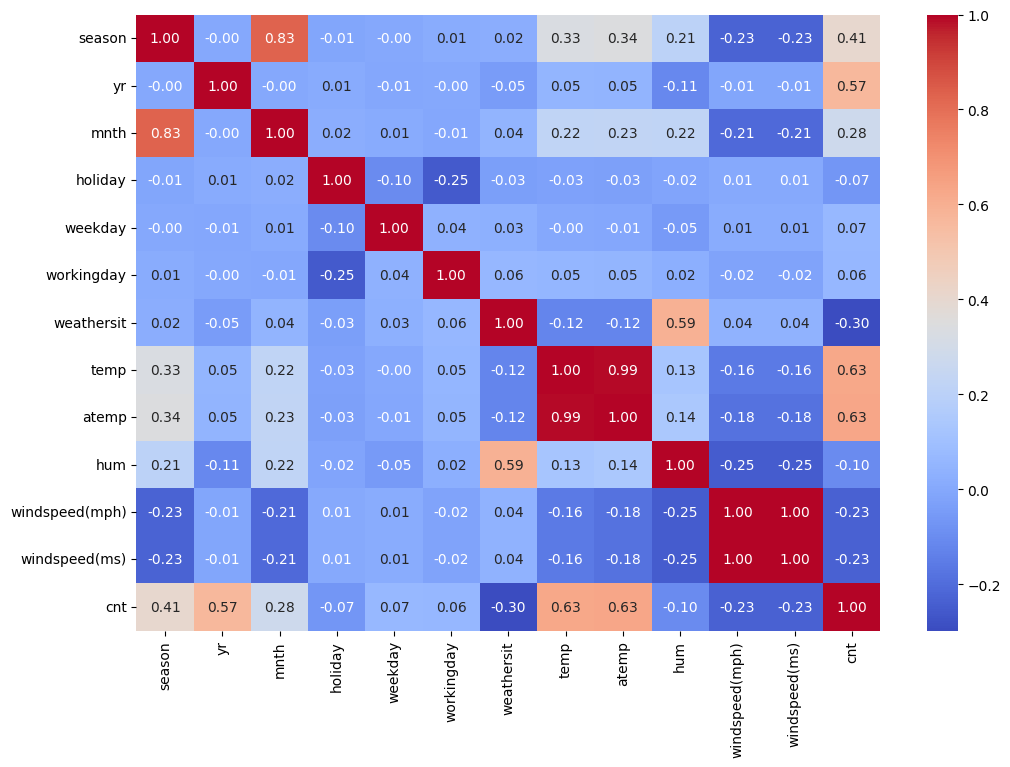

In [130]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

## 3. Barpot

Постройте Bar-график суммарного количества прокатов велосипедов по месяцам за каждый год одновременно. (будет 24 столбика)

**Ответьте на вопрос:** почему в предыдущем графике была такая большая корреляция между количеством прокатов и годом?

**Ответ:** Признак yr - это категориальный признак, который может показать нам только увеличение популярности аренды велосипедов во второй год по сравнению с первым годом. Т.е под категориальными данными мы понимаем данные, которые не имеют численного представления, они имеют два уникальных значения 2011 - 0 и 2012 - 1 (бинарные признаки).

Для работы с категориальными признаками надо произвести кодирование категориальных признаков - процедуру, которая представляет собой некоторое преобразование категориальных признаков в численное представление по некоторым оговоренным ранее правилам, в нашем случае сделать распределение по месяцам.

In [133]:
monthly_rentals_by_year = df.groupby(['yr', 'mnth'])['cnt'].sum().unstack()

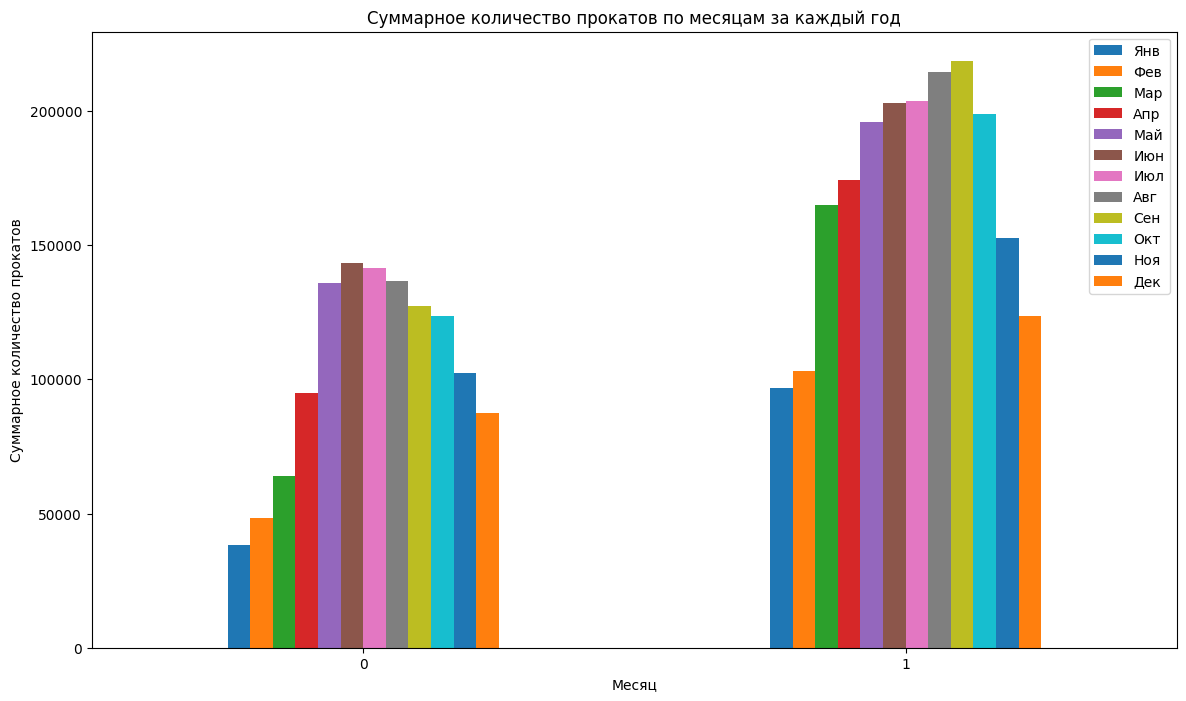

In [134]:
monthly_rentals_by_year.plot(kind='bar', figsize=(14, 8))
plt.title("Суммарное количество прокатов по месяцам за каждый год")
plt.xlabel("Месяц")
plt.ylabel("Суммарное количество прокатов")
plt.xticks(rotation=0)
plt.legend(['Янв', 'Фев', 'Мар', 'Апр', 'Май', 'Июн', 'Июл', 'Авг', 'Сен', 'Окт', 'Ноя', 'Дек'])
plt.show()

## 4. Countplot

Постройте countplot диаграммы для признаков `weekday`, `weathersit`,

**Ответьте на вопрос:** что вы можете сказать о том, как формировался этот датасет.

**Ответьте на вопрос:** как называется распределение значений признака `weekday`?

**Ответ:** на основе имеющихся данных в датасете, я думаю, что этот датасет формировался для прогнозирование спроса на велопрокат в зависимости от различных факторов:

1. Данный собиралси в течении двух лет: 2011 и 2012 гг.
2. Датасет содержит временные признаки таких как "месяц" (mnth), "день недели" (weekday), наличие праздничных дней, наличие рабочих и выходных дней. Эти признаки могут использоваться для анализа влияния сезона и дней недели на количество прокатов.
3. Датасет содержит погодные условия. Разные метеорологические условия влиябт на количество прокатов.
4. Признаки "температура" (temp) и "ощущаемая температура" (atemp) предоставляют информацию о температуре воздуха, которая может влиять на прокаты. Теплая погода может способствовать увеличению числа прокатов.
5. Признаки "влажность" (hum) и "скорость ветра" (windspeed) также включены в датасет. Эти признаки могут использоваться для анализа влияния влажности и скорости ветра на прокаты. Сильный ветер и высокая влажность воздуха могут способствовать уменьшению числа прокатов.
    
**Ответ:**  распределение значений признака weekday называется *равномерным*. Равномерное распределение относится к типу распределения вероятностей, при котором все исходы равновероятны. Т.е. неделя имеет равномерное распределение, потому что вероятность наступления одного из семи дней недели одинакова.

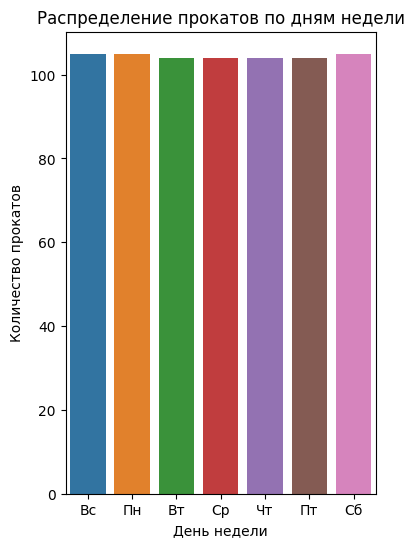

In [135]:
plt.figure(figsize=(4, 6))
sns.countplot(x='weekday', data=df)
plt.title("Распределение прокатов по дням недели")
plt.xlabel("День недели")
plt.ylabel("Количество прокатов")
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Вс', 'Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб'])

plt.show()

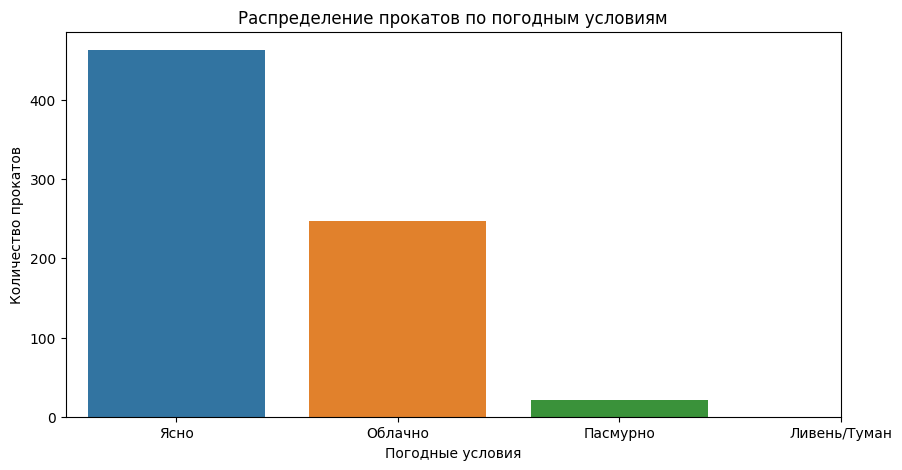

In [136]:
plt.figure(figsize=(10, 5))
sns.countplot(x='weathersit', data=df)
plt.title("Распределение прокатов по погодным условиям")
plt.xlabel("Погодные условия")
plt.ylabel("Количество прокатов")
plt.xticks([0, 1, 2, 3], ['Ясно', 'Облачно', 'Пасмурно', 'Ливень/Туман'])

plt.show()

## 5. Распределение

Постройте распределение целевого признака.

**Ответьте на вопрос:** основываясь на графике, сколько приблизительно в среднем прокатов бывает в день?

**Ответьте на вопрос:** Как называется полученное распределение?.

**Ответ:** приблизительно в среднем прокатов бывает в день 4500.

**Ответ:** распределение называется Нормальным или Гауссовым распределением

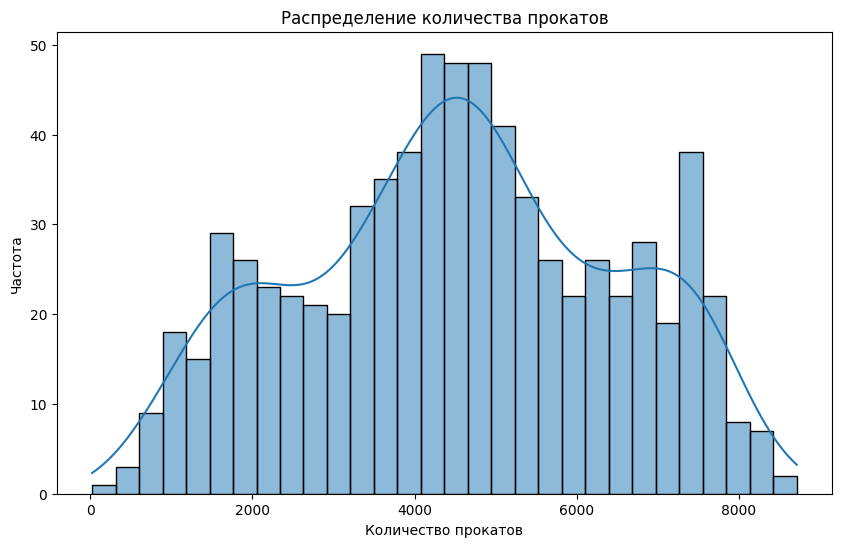

In [137]:
plt.figure(figsize=(10, 6))
sns.histplot(df['cnt'], bins=30, kde=True)
plt.title("Распределение количества прокатов")
plt.xlabel("Количество прокатов")
plt.ylabel("Частота")
plt.show()

## 6. Совместное распределение признаков

Постройте график совместного распределения признаков температура и ощущение температуры.

**Ответьте на вопрос:** вас в этом графике ничего не настораживает? Почему?

**Ответ:** По мне так все вполне хорошо, т.к. в данном случае сильная линейная зависимость обусловлена тем, что  линейная зависимость между "температурой" и "ощущением температуры" ожидаема.
Но, есть точки, которые значительно отклоняются от общего тренда, это может быть признаком выбросов или аномалий в данных. Но их мало, что свидетельствует о хорошем качестве данных.

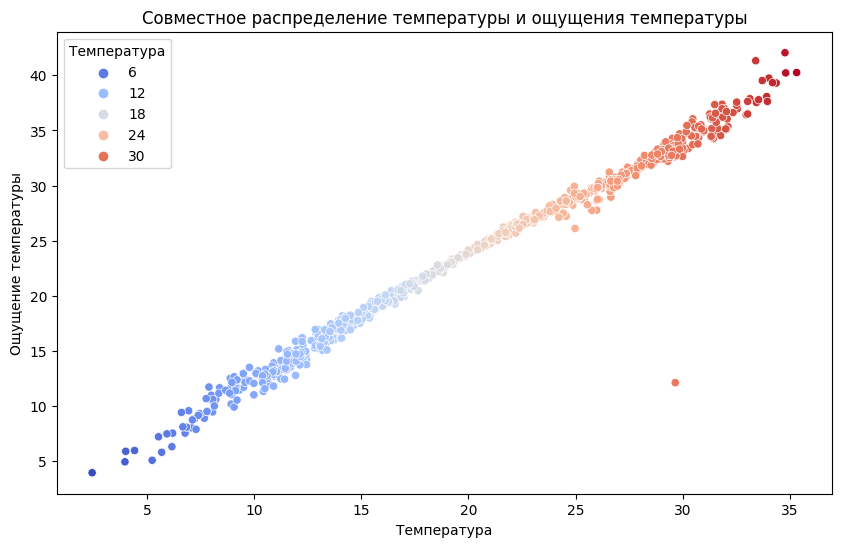

In [138]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='atemp', hue='temp', data=df, palette='coolwarm')
plt.title("Совместное распределение температуры и ощущения температуры")
plt.xlabel("Температура")
plt.ylabel("Ощущение температуры")
plt.legend(title="Температура")
plt.show()

## 7. Ящик с усами

Нарисуйте сами для распределения количества прокатов велосипедов по месяцам в зависимости от того рабочий это день или нет.

**Ответьте на вопрос:** почему в некоторых месяцах чаще берут велосипеды в будний день, а в некоторые - в выходной.


**Ответ:**
1. *Работа и школа:* рабочие и учебные обязанности могут влиять на распределение прокатов. В некоторых месяцах школьные каникулы, например июль и август (июнь обычно время экзаменов и практики в школах и институтах), поэтому в июне больше прокатов в выходные чем в будни, и наоборот в июле и августе больше прокатов в будние.

2. *Погодные условия:* в месяцах с более благоприятной погодой люди могут быть склонны брать велосипеды и в выходные, и в будние дни. Например, март и апрель. Так как этот опрос был в телой стране (погода не опускалась ниже 2 градусов Цельсия в самый холодный месяц). В то время как в холодные и дождливые месяцы (ноябрь, декабрь, январь и февраль) спрос более низкий на выходных. Скорее всего люди добирались на велосипедах на работу или учебу.

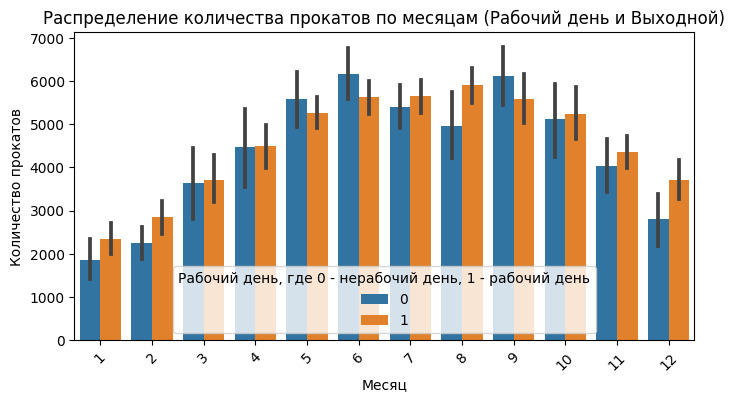

In [139]:
plt.figure(figsize=(8, 4))
sns.barplot(x='mnth', y='cnt', hue='workingday', data=df)
plt.title("Распределение количества прокатов по месяцам (Рабочий день и Выходной)")
plt.xlabel("Месяц")
plt.ylabel("Количество прокатов")
plt.xticks(rotation=45)
plt.legend(title="Рабочий день, где 0 - нерабочий день, 1 - рабочий день")
plt.show()

## 8. Хитрый вопрос

Правда ли, что при более сильном ветре человеку ощущается, что на улице холодне, чем на самом деле? Нарисуйте график, подтверждающий или опровергающий эту гипотезу. Обоснуйте. Возможно, вам придется создать новый признак.

**Рассуждение: ** Для проверки гипотезы о влиянии скорости ветра на ощущение темературы, создадим новый признак - разница между фактической температурой и ощущением температуры. И построим график, чтобы оценить корреляцию между новым признаком и скоростью ветра.

**Итог:** на графике видно, что с увеличением скорости ветра разница между температурой и ощущением температуры немного увеличивается, что может подтверждает гипотезу, но при расчете температуры по ощущениям учитываются температура воздуха, влажность, скорость ветра, солнечная радиация. Поэтому утвержать однозначно нельзя, что скорости ветра на ощущение темературы может сильно влиять.

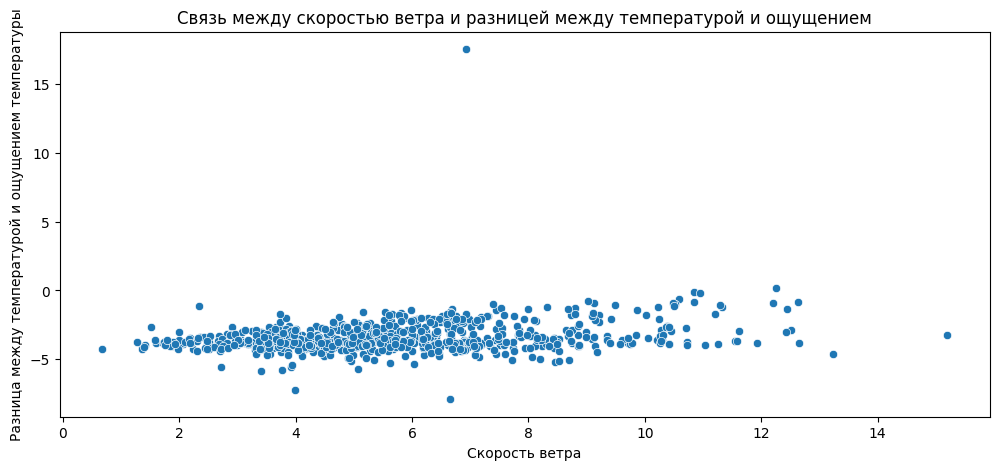

In [140]:
df['temp_diff'] = df['temp'] - df['atemp'] #разница между фактической температурой и ощущением температуры

plt.figure(figsize=(12, 5))
sns.scatterplot(x='windspeed(ms)', y='temp_diff', data=df)
plt.title("Связь между скоростью ветра и разницей между температурой и ощущением")
plt.xlabel("Скорость ветра")
plt.ylabel("Разница между температурой и ощущением температуры")
plt.show()

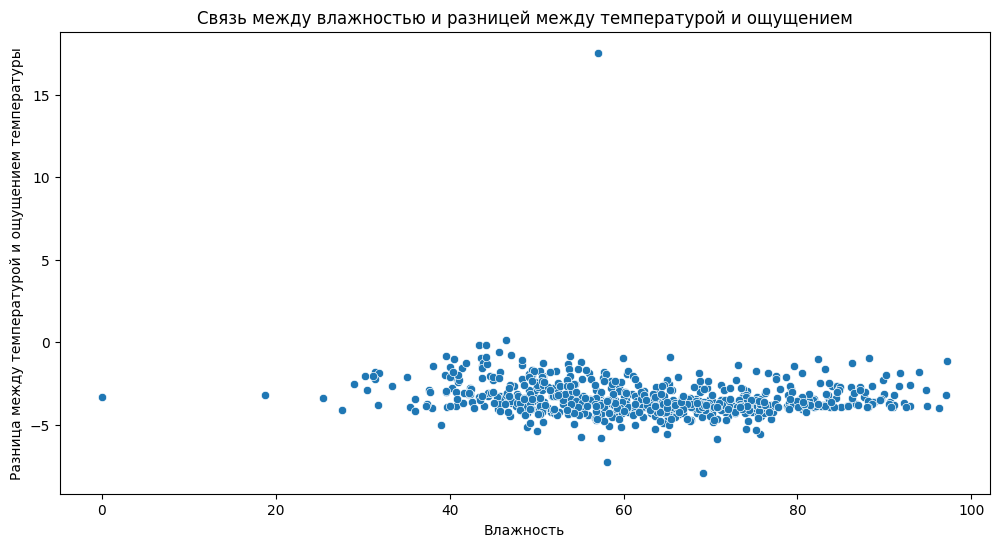

In [141]:
df['temp_diff'] = df['temp'] - df['atemp']

plt.figure(figsize=(12, 6))
sns.scatterplot(x='hum', y='temp_diff', data=df)
plt.title("Связь между влажностью и разницей между температурой и ощущением")
plt.xlabel("Влажность")
plt.ylabel("Разница между температурой и ощущением температуры")
plt.show()